In [1]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import cifar10  # veri seti
from tensorflow.keras.utils import to_categorical  # one-hot encoding
from tensorflow.keras.models import Sequential  # encoding
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # feature extraction
from tensorflow.keras.layers import Dense, Flatten, Dropout  # classification
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # data augmentation

from sklearn.metrics import classification_report

In [2]:
# load cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# görselleştirme
class_labels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

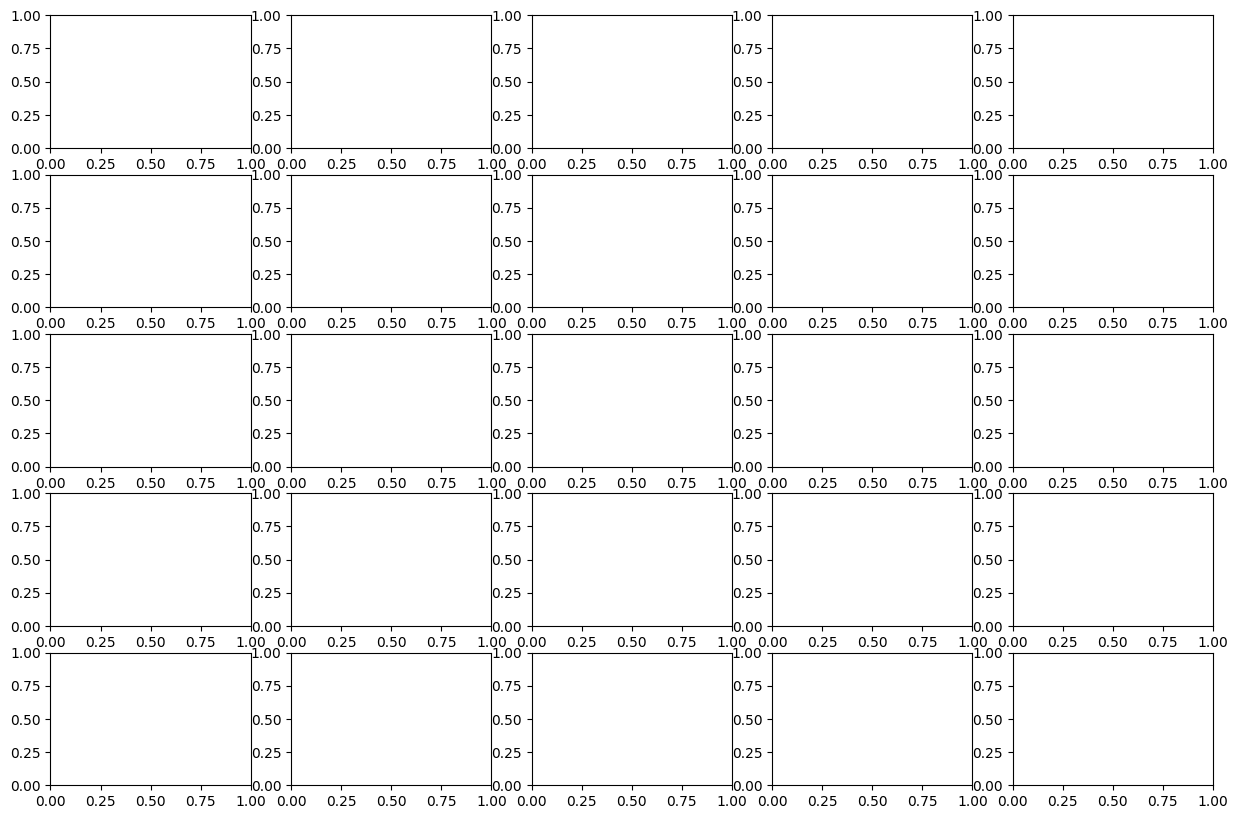

In [4]:
fig,axes = plt.subplots(5,5,figsize=(15,10))
for i in range(5):
  axes[i].imshow(x_train[i])
  label = class_labels[y_train[i]]
  axes[i].set_title(label)
  axes[i].axis("off")

plt.show()

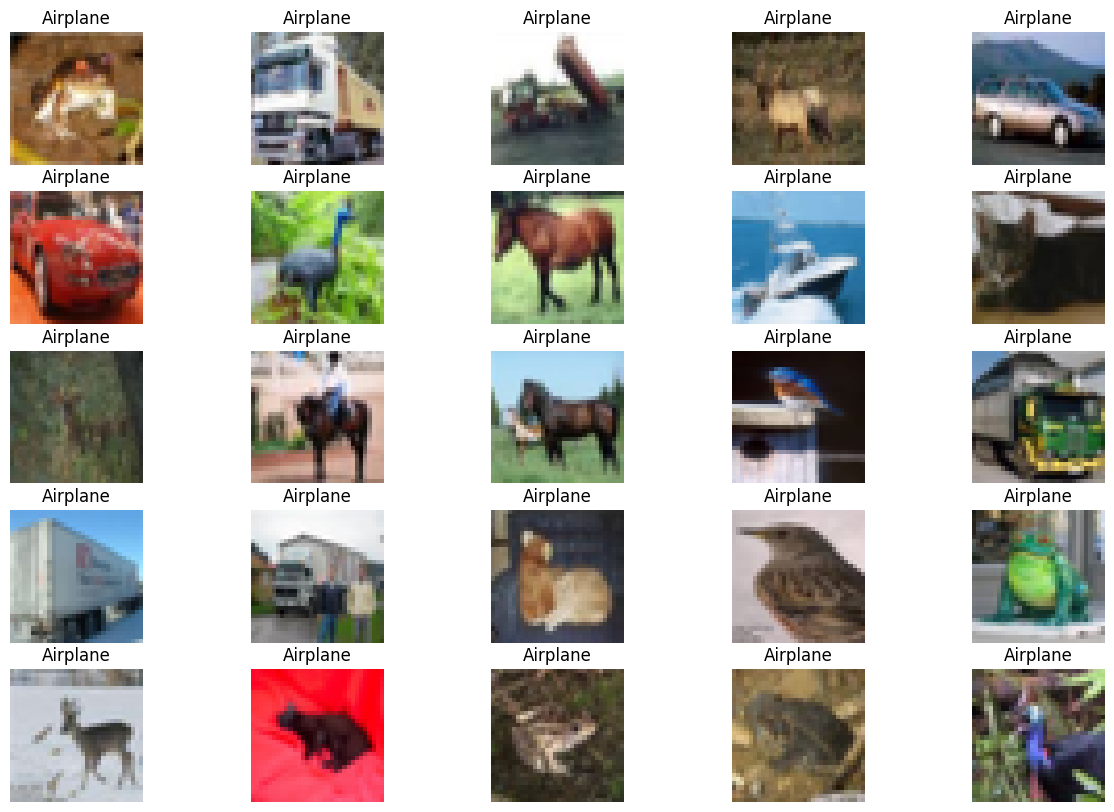

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))

for i in range(5):
    for j in range(5):
        # Access the subplot using both i and j indices
        axes[i, j].imshow(x_train[i * 5 + j])
        # Get the original class label using argmax before one-hot encoding
        label_index = np.argmax(y_train[i * 5 + j])  # Find the index of the maximum probability
        label = class_labels[label_index]  # Get the corresponding class label
        axes[i, j].set_title(label)
        axes[i, j].axis("off")

plt.show()

In [7]:
# veri seti normalizasyonu

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [6]:
#one-hot encoding
y_train = to_categorical(y_train,10) # 10 class var, bu nedenle 10 yazıyoruz
y_test = to_categorical(y_test,10)

In [8]:
from textwrap import fill
# veri arttırımı (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=20, #20 dereceye kadar donme sağlar
    width_shift_range=0.2, #görüntüyü yatayda %20 kaydırma
    shear_range=0.2, #görüntüyü üzerinde kaydırma
    zoom_range=0.2, #görüntüyü yakınlaştırma
    height_shift_range=0.2, #görüntüyü dikeyde kaydırma
    horizontal_flip=True, # görüntüyü yatayda ters çevirme
    fill_mode="nearest" # boşluğu en yakın piksel ile doldurma
)

datagen.fit(x_train) #data augmentation'ı eğitim verileri üzerinde uygula

In [9]:
model = Sequential()

# Feature Extraction: CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # bağlantıların %25'ini rastgele olarak kapat

# Feature Extraction: CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # bağlantıların %25'ini rastgele olarak kapat

#Classification: FLATTEN, DENSE, RELU, DROPOUT, DNSE (OUTPUT LAYER)
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# model derleme
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=0.0001,decay =1e-6),
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [14]:
# model training
history = model.fit(datagen.flow(x_train,y_train,batch_size=512), #data augmentation uygulanmış veri akışı
          epochs=20,#eğitim dönem sayısı
          validation_data=(x_test,y_test)) #doğrulama seti

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.5718 - loss: 1.2026 - val_accuracy: 0.6052 - val_loss: 1.0961
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.5733 - loss: 1.2020 - val_accuracy: 0.6142 - val_loss: 1.0764
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.5704 - loss: 1.2007 - val_accuracy: 0.6206 - val_loss: 1.0634
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.5762 - loss: 1.1909 - val_accuracy: 0.6196 - val_loss: 1.0583
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 266ms/step - accuracy: 0.5748 - loss: 1.1947 - val_accuracy: 0.6092 - val_loss: 1.1027
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 269ms/step - accuracy: 0.5798 - loss: 1.1952 - val_accuracy: 0.6297 - val_loss: 1.0493
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 270ms/step - accuracy: 0.5772 - loss: 1.1872 - val_accuracy: 0.6125 - val_loss: 1.0850
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.5756 - loss: 1.1911 - val_accu

In [15]:
# modelin test seti üzerindeki tahmini
y_pred = model.predict(x_test) #y_pred=[0,1] mesela 0,8 cıkarsa %80 olma olasılığı ollarak tariflenebilir

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [16]:
y_pred_class = np.argmax(y_pred,axis=1) # tahmin edilen sınıfları al
y_true = np.argmax(y_test,axis=1) # gerçek sınıfları al

In [17]:
# Classification report hesapla
report = classification_report(y_true,y_pred_class,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    Airplane       0.72      0.68      0.70      1000
  Automobile       0.66      0.89      0.76      1000
        Bird       0.74      0.38      0.50      1000
         Cat       0.56      0.33      0.42      1000
        Deer       0.72      0.42      0.53      1000
         Dog       0.63      0.53      0.58      1000
        Frog       0.53      0.88      0.66      1000
       Horse       0.63      0.76      0.69      1000
        Ship       0.78      0.78      0.78      1000
       Truck       0.62      0.82      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.63     10000
weighted avg       0.66      0.65      0.63     10000



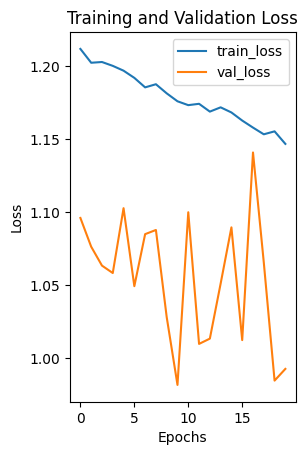

In [18]:
plt.figure()
# kayıp grafikleri
plt.subplot(1,2,1) # 1 satır, 2 sütun ve 1. subplot
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

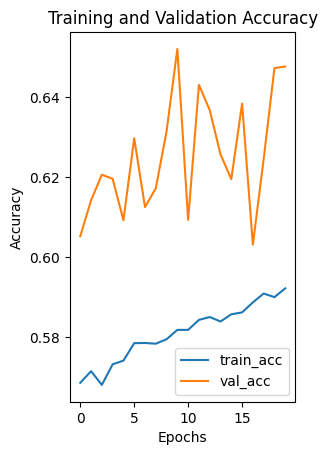

In [19]:
# accuracy
plt.subplot(1,2,2) # 1 satır, 2 sütun ve 2. subplot
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()